In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def yt(x, t):
    return 5*t*(0.2969*x**0.5 - 0.1260*x - 0.3516*x**2 + 0.2843*x**3 - 0.1015*x**4)

In [10]:
x = np.linspace(0, 1, num=20000)
y = yt(x, 0.2)

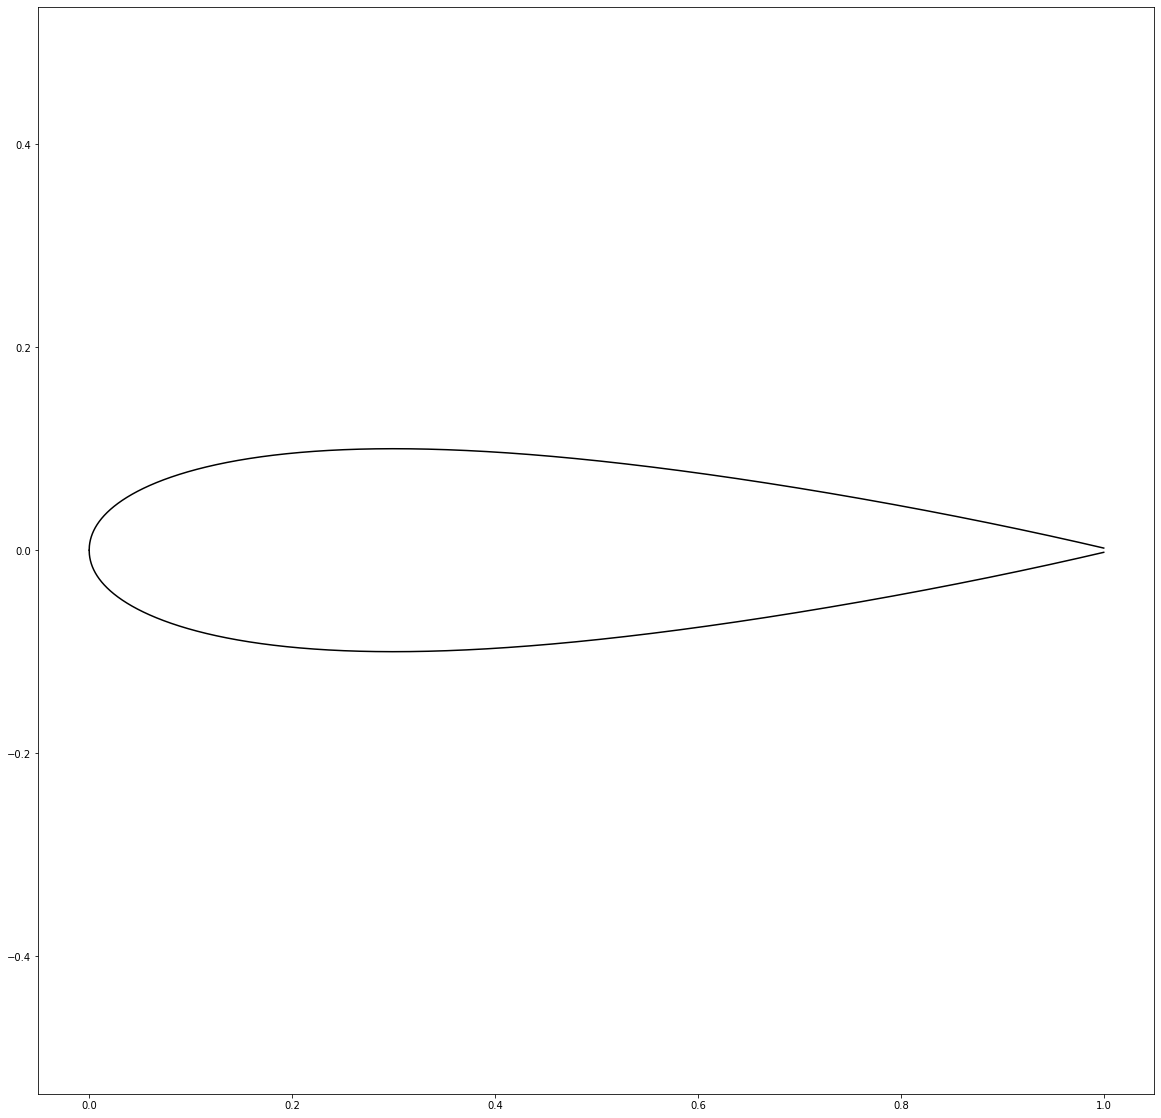

In [11]:
plt.figure(figsize=(20,20))
plt.axis('equal')
plt.plot(x, -y, 'black')
plt.plot(x, y, 'black')

In [40]:
SHAPE_SPACE_ORDER = 3

def least_squares(x, y):
    upper_surface_coeffs = least_squares_surface(x, y)
    lower_surface_coeffs = least_squares_surface(x, -y)

    print(f"Upper surface coefficients: {upper_surface_coeffs}")
    print(f"Lower surface coefficients: {lower_surface_coeffs}")

    t = np.linspace(0, 1, 200)
    us = [shape_space_thickness(v, SHAPE_SPACE_ORDER, upper_surface_coeffs) for v in t]
    ls = [shape_space_thickness(v, SHAPE_SPACE_ORDER, lower_surface_coeffs) for v in t]
    plt.plot(t, us, 'r', t, ls, 'r')

    plt.plot(x, y, 'b', x, -y, 'b')

    # plt.axis('equal')
    plt.show()


def least_squares_surface(x, y):
    phi = [shape_space_basis_func(v, SHAPE_SPACE_ORDER) for v in x]
    psuedoinverse = np.linalg.pinv(phi)
    return np.matmul(psuedoinverse, y)


def shape_space_basis_func(x, n):
    return [math.comb(n, i) * x**(i+0.5) * (1-x)**(n-i+1) for i in range(n+1)]


def shape_space_thickness(psi, n, A):
    return np.dot(A, shape_space_basis_func(psi, n))

Upper surface coefficients: [0.1679916  0.15851636 0.1313818  0.15751629]
Lower surface coefficients: [-0.1679916  -0.15851636 -0.1313818  -0.15751629]


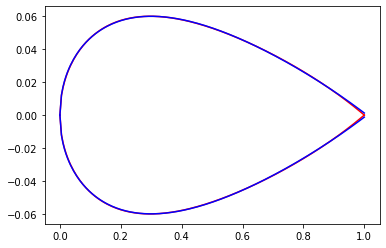

In [41]:
least_squares(x,y)